# Testing various methods on CIFAR10

In [17]:
#import libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from matplotlib import pyplot as plt

In [8]:
from cubic_newton import CubicNewton

In [9]:
#load dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


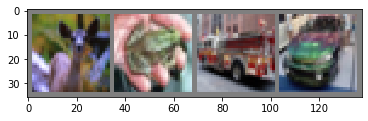

 deer  frog truck   car


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [16]:
next(trainloader)

TypeError: 'DataLoader' object is not an iterator

In [18]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [25]:
inputs, labels = next(dataiter)

In [27]:
inputs.params

AttributeError: 'Tensor' object has no attribute 'params'

In [56]:
# forward + backward + optimize
outputs = net(inputs)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()

In [62]:
for elem in net.parameters():
    print(elem.grad)

tensor([[[[-2.9941e-02, -3.3772e-02, -3.1841e-02, -3.4591e-02, -3.0901e-02],
          [-1.9609e-02, -2.7802e-02, -3.3511e-02, -3.6392e-02, -2.8297e-02],
          [-2.1353e-02, -2.6860e-02, -3.0885e-02, -3.2315e-02, -2.5988e-02],
          [-2.1561e-02, -2.4204e-02, -2.7912e-02, -2.9007e-02, -2.7536e-02],
          [-1.8519e-02, -1.8329e-02, -1.6934e-02, -1.6320e-02, -1.6889e-02]],

         [[-2.7803e-02, -2.7821e-02, -2.2375e-02, -2.5680e-02, -2.2917e-02],
          [-1.8756e-02, -2.3082e-02, -2.5605e-02, -2.8568e-02, -2.3137e-02],
          [-2.0126e-02, -2.2502e-02, -2.5295e-02, -2.7502e-02, -2.3472e-02],
          [-2.0268e-02, -2.0463e-02, -2.3401e-02, -2.5388e-02, -2.8975e-02],
          [-1.5066e-02, -1.4279e-02, -1.0783e-02, -1.1162e-02, -2.0505e-02]],

         [[-1.1899e-02, -4.8356e-03,  3.9895e-03,  1.5781e-03, -7.3949e-03],
          [ 4.2124e-04,  1.1501e-03,  6.0460e-05, -1.5368e-03, -6.9260e-03],
          [-1.7890e-04,  3.5090e-03,  5.0711e-04, -3.1024e-03, -8.1075e-

In [52]:
outputs.grad_fn()

TypeError: expected 1 arguments, got 0 instead

In [26]:
grads = torch.autograd.grad(output, params, create_graph = True)
dot = 0
for i in range(len(grads)):
    dot += grads[i].mul(vector[i]).sum()
hvp = torch.autograd.grad(dot, params, retain_graph = True)
return hvp

NameError: name 'output' is not defined

In [12]:
Y = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            Y.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

plt.plot(range(len(Y)), Y)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of iteration (log)')
plt.ylabel('<Loss>_100')

KeyboardInterrupt: 

In [ ]:
import torch.optim as optim
from matplotlib import pyplot as plt

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Z = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            Z.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

In [ ]:
import torch.optim as optim
from matplotlib import pyplot as plt

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.LBFGS(net.parameters(), lr=0.001)

A = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        def closure():
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            return loss
        
        optimizer.step(closure)
            

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            A.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

In [ ]:
import torch.optim as optim
from matplotlib import pyplot as plt

net = Net()

criterion = nn.CrossEntropyLoss()
inputs, labels = data
optimizer = CubicNewton(net.parameters(), net(inputs), lr=0.001)

B = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        def closure():
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            return loss
        
        optimizer.step(closure)
            

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            B.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

# SCR

In [ ]:
import torch.optim as optim
from matplotlib import pyplot as plt
from nielish import SCR

net = Net()

criterion = nn.CrossEntropyLoss()
inputs, labels = data
optimizer = SCR(net.parameters(), lr=0.001)

C = []

for epoch in range(0):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        def closure():
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            return loss
        
        optimizer.step(closure)
            

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            C.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

In [ ]:
plt.plot(range(len(Y)), Y)
plt.plot(range(len(Z)), Z)
plt.plot(range(len(A)), A)
plt.plot(range(len(B)), B)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of iteration (log)')
plt.ylabel('<Loss>_100')
plt.legend(['Adam', 'SGD', 'LBFGS', 'Cubic-Newton'])
plt.show()

In [ ]:
PATH = './cifar_net-Adam.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

In [ ]:
net.to(device)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)